In [1]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

%matplotlib inline
plt.style.use('ggplot') # nicer plots
np.random.seed(52102) # always use the same random seed to make results comparable

In [3]:
nn = pa.ann.NetworkMLP([5,6], 5, outputs=1, activation="tanh")

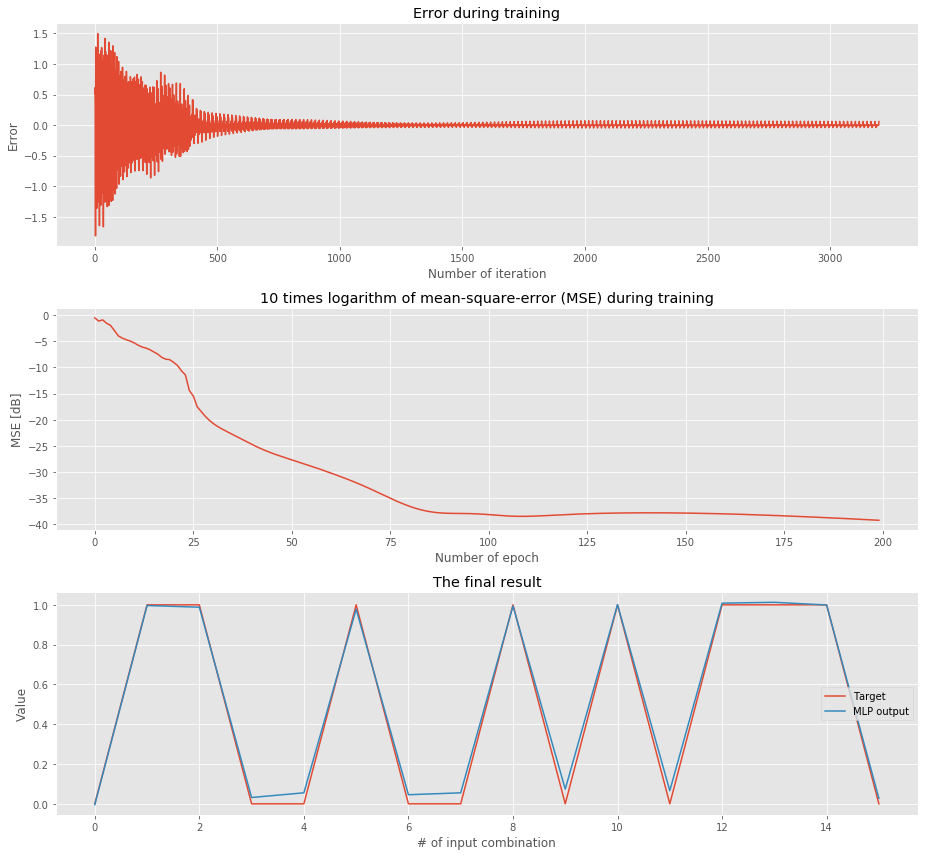

In [4]:
# data creation
x = np.array([
        [0,0,0,0], [1,0,0,0], [0,1,0,0], [1,1,0,0],
        [0,0,1,0], [1,0,1,0], [0,1,1,0], [1,1,1,0],
        [0,0,0,1], [1,0,0,1], [0,1,0,1], [1,1,0,1],
        [0,0,1,1], [1,0,1,1], [0,1,1,1], [1,1,1,1]
    ])
d = np.array([0,1,1,0,0,1,0,0,1,0,1,0,1,1,1,0])
N = len(d)
n = 4

# creation of neural network (again)
nn = pa.ann.NetworkMLP([5,6], n, outputs=1, activation="tanh")    

# training
e, mse = nn.train(x, d, epochs=200)    
    
# see how it works (validation)
y = nn.run(x[-1000:])
       
# display of the result
plt.figure(figsize=(13,12))
plt.subplot(311)
plt.plot(e)
plt.title("Error during training"); plt.ylabel("Error"); plt.xlabel("Number of iteration")

plt.subplot(312)
plt.plot(10*np.log10(mse))
plt.title("10 times logarithm of mean-square-error (MSE) during training");
plt.ylabel("MSE [dB]"); plt.xlabel("Number of epoch")

plt.subplot(313)
plt.plot(d, label="Target")
plt.plot(y, label="MLP output")
plt.title("The final result"); plt.ylabel("Value"); plt.xlabel("# of input combination")
plt.legend(); plt.tight_layout(); plt.show()

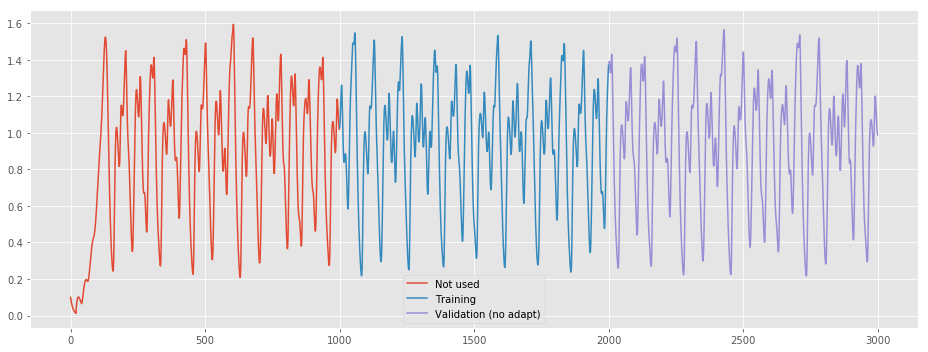

In [8]:
N = 3000
p1 = 0.2; p2 = 0.8; p3 = 0.9; p4 = 20; p5 = 10.0
d = np.zeros(N)
d[0] = 0.1
for k in range(0,N-1):
    d[k+1]  = (p3*d[k]) + ( (p1*d[k-p4]) / (p2 + ( d[k-p4]**p5)) )    

plt.figure(figsize=(13,5))
plt.plot(range(N-2000), d[:-2000], label="Not used")
plt.plot(range(N-2000, N-1000), d[-2000:-1000], label="Training")
plt.plot(range(N-1000, N), d[-1000:], label="Validation (no adapt)")
plt.legend(); plt.tight_layout(); plt.show()

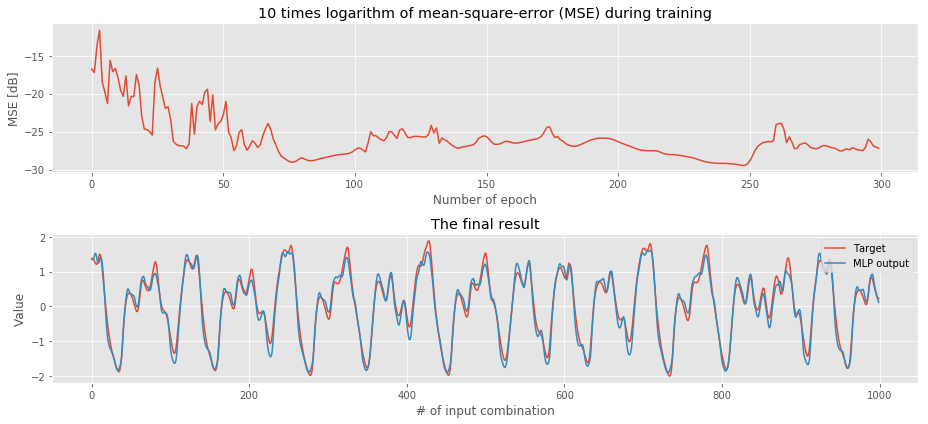

In [7]:
# data creation
N = 3000
p1 = 0.2; p2 = 0.8; p3 = 0.9; p4 = 20; p5 = 10.0
d = np.zeros(N)
d[0] = 0.1
for k in range(0,N-1):
    d[k+1]  = (p3*d[k]) + ( (p1*d[k-p4]) / (p2 + ( d[k-p4]**p5)) )   

# data normalization
d = (d - d.mean()) / d.std()

# input forming from historic values
n = 30
x = pa.input_from_history(d, n)[:-1]
d = d[n:]
N = len(d)


# creation of new neural network
nn = pa.ann.NetworkMLP([10,20,10], n, outputs=1, activation="sigmoid")    

# training
e, mse = nn.train(x[1000:2000], d[1000:2000], epochs=300) 

# see how it works (validation)
y = nn.run(x[-1000:])

# result display
plt.figure(figsize=(13,6))
plt.subplot(211)
plt.plot(10*np.log10(mse))
plt.title("10 times logarithm of mean-square-error (MSE) during training");
plt.ylabel("MSE [dB]"); plt.xlabel("Number of epoch")

plt.subplot(212)
plt.plot(d[-1000:], label="Target")
plt.plot(y, label="MLP output")
plt.title("The final result"); plt.ylabel("Value"); plt.xlabel("# of input combination")
plt.legend(); plt.tight_layout(); plt.show()

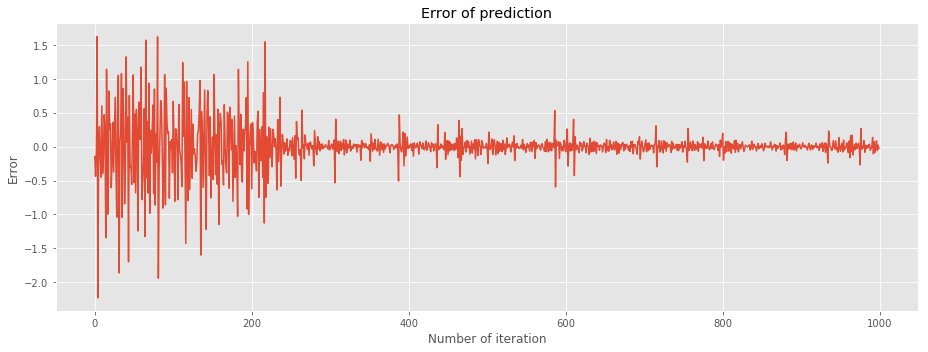

In [9]:
def measure_x():
    # this is your measurement of the process inputs (3 values)
    x = np.random.normal(0, 0.5, 3)
    return x

def measure_d(x):
    # this is your measurement of the system output - your target
    d = 0.8*x[0] + 0.2*x[1] - 1.*x[2]
    return d

# creation of new neural network
nn = pa.ann.NetworkMLP([20,20], 3, outputs=1, activation="sigmoid")   

# run for N samples
N = 1000
e = np.zeros(N)
for k in range(N):
    x = measure_x()
    y = nn.predict(x)
    # do the stuff with predicted value
    # ...
    # when possible, measure what was the real value of output and update MLP
    d = measure_d(x)
    e[k] = nn.update(d)

plt.figure(figsize=(13,5))
plt.plot(e)
plt.title("Error of prediction"); plt.ylabel("Error"); plt.xlabel("Number of iteration")
plt.tight_layout(); plt.show()
